In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [38]:
customer = pd.read_csv(r"C:\Users\shash\olist_file\data\raw\olist_customers_dataset.csv")
customer.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [39]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [40]:
customer.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [41]:
customer.shape

(99441, 5)

In [42]:
customer.duplicated().sum()


np.int64(0)

In [43]:
customer["customer_id"].duplicated().sum()

np.int64(0)

In [44]:
customer["customer_unique_id"].duplicated().sum()

np.int64(3345)

In [45]:
customer.isnull().sum()


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [46]:
state_customer_count = (
    customer.groupby("customer_state")["customer_unique_id"].nunique().reset_index()
)
state_customer_count.columns = ["state", "unique_customer_count"]
state_customer_count = state_customer_count.sort_values(
    by="unique_customer_count",
    ascending=False
)

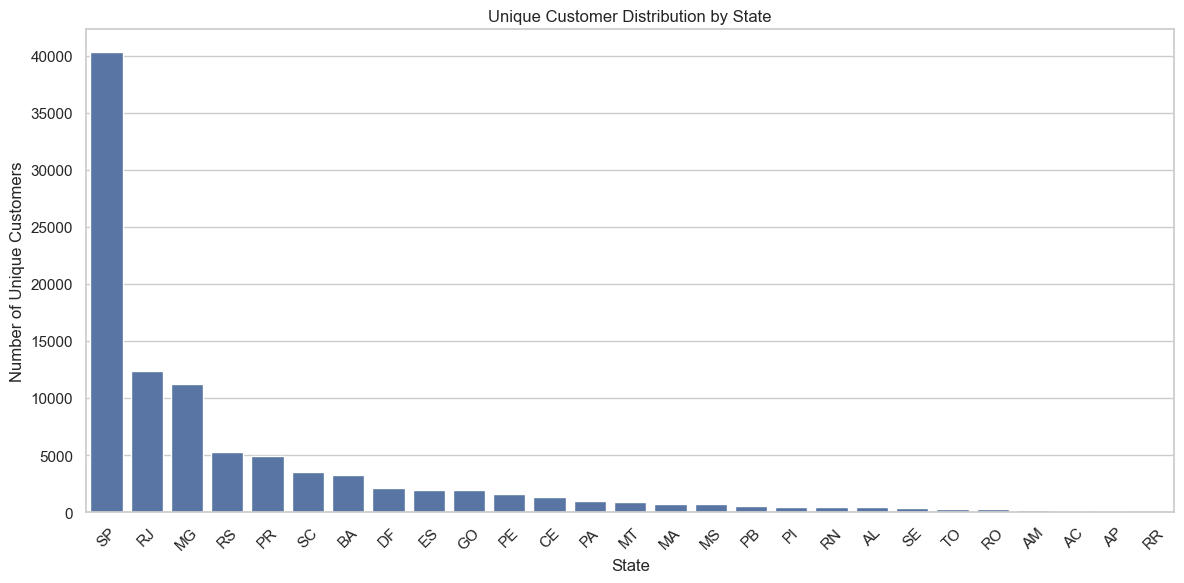

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=state_customer_count,
    x="state",
    y="unique_customer_count"
)

plt.title("Unique Customer Distribution by State")
plt.xlabel("State")
plt.ylabel("Number of Unique Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
top_10_states = state_customer_count.head(10)
top_10_states


,state,unique_customer_count
25,SP,40302
18,RJ,12384
10,MG,11259
22,RS,5277
17,PR,4882
23,SC,3534
4,BA,3277
6,DF,2075
7,ES,1964
8,GO,1952


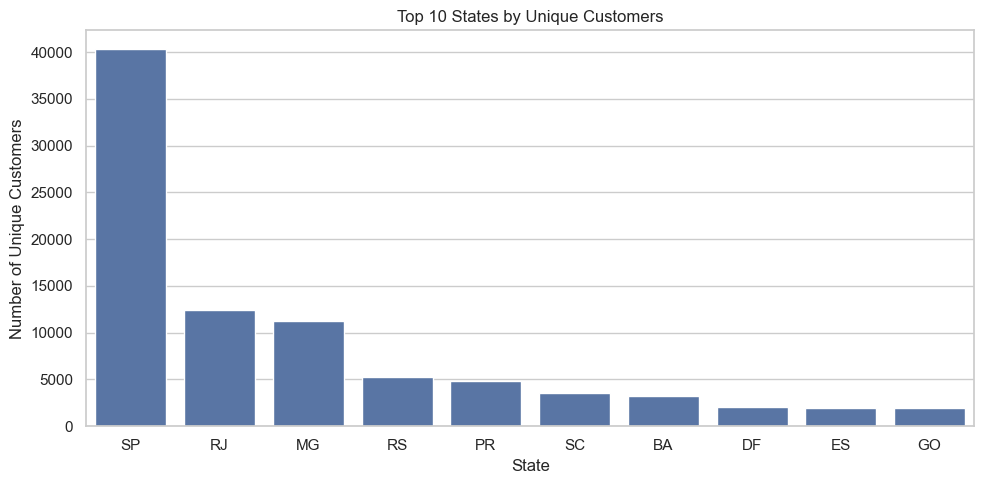

In [49]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_10_states,
    x="state",
    y="unique_customer_count"
)

plt.title("Top 10 States by Unique Customers")
plt.xlabel("State")
plt.ylabel("Number of Unique Customers")
plt.tight_layout()
plt.show()


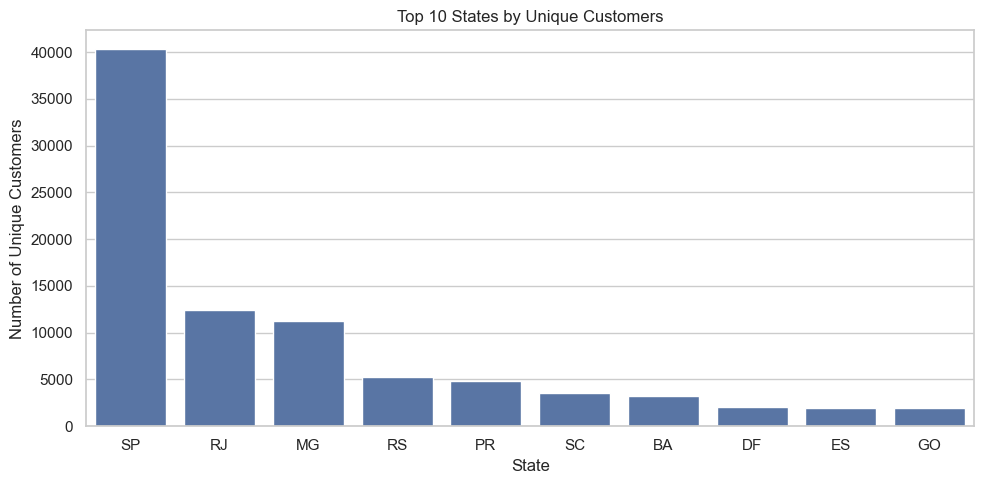

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_10_states,
    x="state",
    y="unique_customer_count"
)

plt.title("Top 10 States by Unique Customers")
plt.xlabel("State")
plt.ylabel("Number of Unique Customers")
plt.tight_layout()
plt.savefig("../visuals/charts/top_10_states_unique_customers.png", dpi=300)
plt.show()
